In [84]:
import requests
import pandas as pd
import lxml
import numpy as np
import seaborn as sns

In [4]:
from bs4 import BeautifulSoup

In [24]:
url = 'https://www.pdfdrive.com/category/5'
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
webpage = requests.get(url, headers = headers).text
soup = BeautifulSoup(webpage, 'html')

In [36]:
title = []
pages = []
year = []
size_mb = []

In [57]:
# for title_tag in soup.find_all('h2'):
#     title.append(title_tag.text)

In [48]:
# for x in soup.find_all('span', class_='fi-size'):
#     size_mb.append(x.text)

In [59]:
len(title)

20

In [66]:
df = pd.DataFrame({"Title":title, "Pages":pages, "year":year, "size":size_mb})

In [67]:
df.Pages = df.Pages.apply(lambda x: x.split(' ')[0])

In [72]:
df['size_type'] = df['size'].apply(lambda x: str(x).split(' ')[1])

In [74]:
df['size'] = df['size'].apply(lambda x: x.split(' ')[0])

In [82]:
df.size_type = np.where((df['size_type'] == 'MB'), 1, 0)

<Axes: ylabel='Pages'>

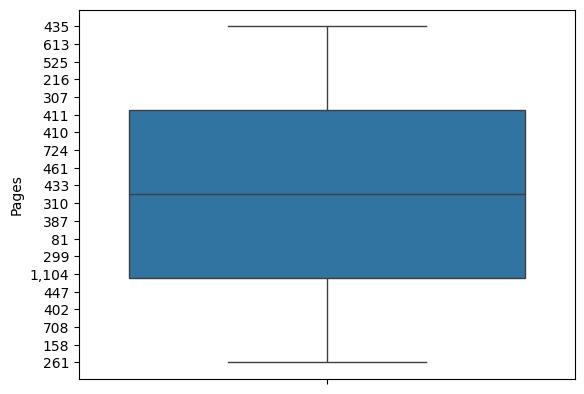

In [87]:
sns.boxplot(df.Pages)